<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 123.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 128.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 104.0 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [3]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [24]:
df.info('ResponseId')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    ResponseId                      int64  
 1    MainBranch                      object 
 2    Age                             object 
 3    Employment                      object 
 4    RemoteWork                      object 
 5    Check                           object 
 6    CodingActivities                object 
 7    EdLevel                         object 
 8    LearnCode                       object 
 9    LearnCodeOnline                 object 
 10   TechDoc                         object 
 11   YearsCode                       object 
 12   YearsCodePro                    object 
 13   DevType                         object 
 14   OrgSize                         object 
 15   PurchaseInfluence               object 
 16   BuyNewTool                      object 
 17   BuildvsBuy

In [5]:
#missing value in 'Industry' column
df['Industry'].isna().sum()

np.int64(36579)

In [6]:
#check unique value
print('\nThere are', df['Industry'].nunique(), 'unique Industry values in the survey:')
print(df['Industry'].value_counts())


There are 15 unique Industry values in the survey:
Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64


In [7]:
import numpy as np

#impute (replace) all the empty rows in the column Industry with the majority value
df['Industry'].replace(np.nan,"Software Development", inplace=True)

/tmp/ipykernel_301/3206264656.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Industry'].replace(np.nan,"Software Development", inplace=True)


In [8]:
#check missing value again
df['Industry'].isna().sum()

np.int64(0)

In [9]:
#check unique value again
print('\nThere are', df['Industry'].nunique(), 'unique Industry values in the survey:')
print(df['Industry'].value_counts())


There are 15 unique Industry values in the survey:
Industry
Software Development                          48497
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64


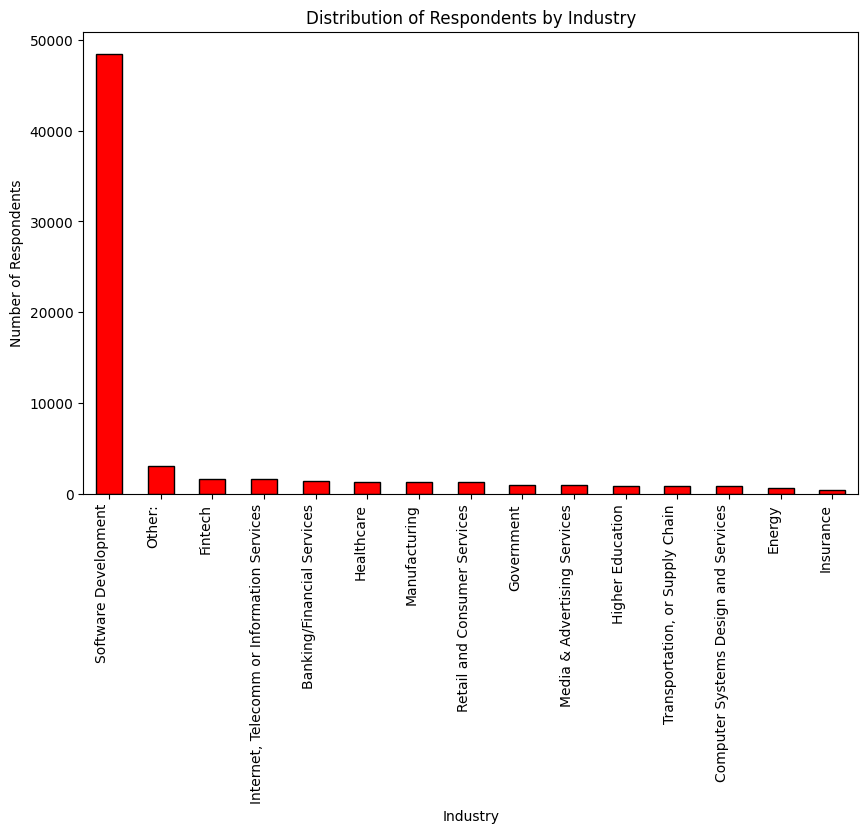

In [10]:
import matplotlib.pyplot as plt

industry_counts = df['Industry'].value_counts()
plt.figure(figsize=(10, 6))
ax = industry_counts.plot(kind='bar', color='red', edgecolor='black')
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90, ha='right')
plt.show()

In [11]:
print("\nKey Trends:")
print("- The bar chart visually represents the proportion of respondent from every industry category.")
print("- By observing the height of each bar, one can quickly identify the most prevalent and least prevalent satisfaction levels.")
print("- The heighest bar indicates mostly respondent is from software development industry.")


Key Trends:
- The bar chart visually represents the proportion of respondent from every industry category.
- By observing the height of each bar, one can quickly identify the most prevalent and least prevalent satisfaction levels.
- The heighest bar indicates mostly respondent is from software development industry.


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [12]:
#missing value in 'ConvertedCompYearly' column
df['ConvertedCompYearly'].isna().sum()

np.int64(42002)

In [13]:
#check unique value
print('\nThere are', df['ConvertedCompYearly'].nunique(), 'unique ConvertedCompYearly values in the survey:')
print(df['ConvertedCompYearly'].value_counts())


There are 6113 unique ConvertedCompYearly values in the survey:
ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
           ... 
9711.0        1
950000.0      1
51448.0       1
447569.0      1
4738.0        1
Name: count, Length: 6113, dtype: int64


In [14]:
#calculate the mean value for the "ConvertedCompYearly" column
avg_convcompyearly = df["ConvertedCompYearly"].astype("float").mean(axis=0)
print("Average of ConvertedCompYearly:", avg_convcompyearly)

#replace the missing 'ConvertedCompYearly' values by the mean value
df["ConvertedCompYearly"].replace(np.nan, avg_convcompyearly, inplace=True)

Average of ConvertedCompYearly: 86155.28726264134


/tmp/ipykernel_301/1226031951.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ConvertedCompYearly"].replace(np.nan, avg_convcompyearly, inplace=True)


In [15]:
#calculate statistics for the 'ConvertedCompYearly' column
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_dev_comp = df['ConvertedCompYearly'].std()

print(f"Basic Statistics for ConvertedCompYearly:")
print(f"Mean compensation: {mean_comp}")
print(f"Median compensation: {median_comp}")
print(f"Standard deviation: {std_dev_comp}")

Basic Statistics for ConvertedCompYearly:
Mean compensation: 86155.28726264134
Median compensation: 86155.28726264134
Standard deviation: 111761.3572523415


In [16]:
#define the outlier threshold
threshold = mean_comp + 3 * std_dev_comp
print(f"Threshold for extremely high compensation (Mean + 3*StdDev): {threshold:,.2f}\n")

#identify respondents with compensation above the threshold
high_earners_df = df[df['ConvertedCompYearly'] > threshold].copy()

#select only the 'ResponseId' and 'ConvertedCompYearly' columns for the new DataFrame
high_earners_df = high_earners_df[['ResponseId', 'ConvertedCompYearly']]

#count the high earner
high_earner_count = len(high_earners_df)

print("Respondents with extremely high yearly compensation (exceeding threshold):")
print(high_earners_df)
print(f"Total count of high earners (ResponseIDs): {high_earner_count} people")

Threshold for extremely high compensation (Mean + 3*StdDev): 421,439.36

Respondents with extremely high yearly compensation (exceeding threshold):
       ResponseId  ConvertedCompYearly
529           530             650000.0
594           595             432000.0
828           829            1000000.0
920           921             500000.0
1081         1082             500000.0
...           ...                  ...
40188       40189             429429.0
40288       40289             438767.0
40373       40374             644437.0
40952       40953             750000.0
41027       41028             700000.0

[193 rows x 2 columns]
Total count of high earners (ResponseIDs): 193 people


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1 (25th percentile): 86155.28726264134
Q3 (75th percentile): 86155.28726264134
Interquartile Range (IQR): 0.0
Lower bound for outliers: 86155.28726264134
Upper bound for outliers: 86155.28726264134

Outliers identified:
       ResponseId  ConvertedCompYearly
72             73               7322.0
374           375              30074.0
379           380              91295.0
385           386              53703.0
389           390             110000.0
...           ...                  ...
41180       41181              44640.0
41184       41185             170000.0
41185       41186             116844.0
41186       41187              12000.0
41187       41188             222834.0

[23435 rows x 2 columns]

Number of outliers: 23435


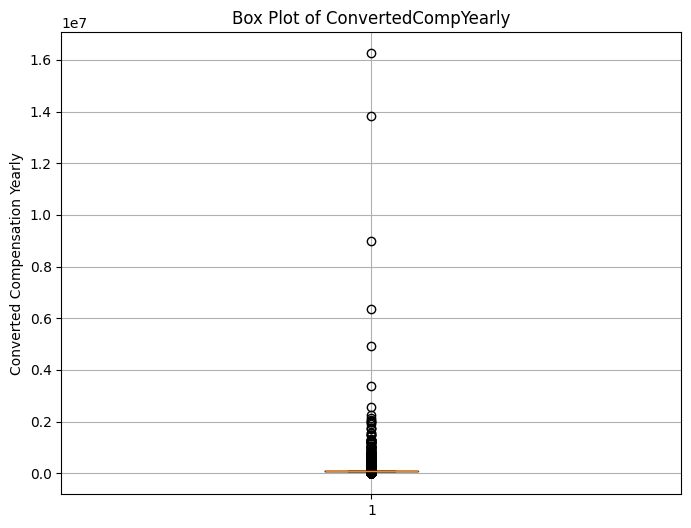

In [20]:
#calculate the Quartiles (Q1 and Q3)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

#calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

#determine outlier bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

#identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

#count outliers in a new DataFrame
outliers_count_df = outliers[['ResponseId', 'ConvertedCompYearly']]
print(f"\nOutliers identified:\n{outliers_count_df}")
print(f"\nNumber of outliers: {len(outliers_count_df)}")

#visualize outliers with a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['ConvertedCompYearly'])
plt.title('Box Plot of ConvertedCompYearly')
plt.ylabel('Converted Compensation Yearly')
plt.grid(True)
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [21]:
#create a new DataFrame excluding outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

#validate the size of the new DataFrame
original_size = df.shape[0]
new_size = df_no_outliers.shape[0]

print(f"\nOriginal DataFrame size: {original_size} rows")
print(f"New DataFrame size (without outliers): {new_size} rows")
print(f"Number of outliers removed: {original_size - new_size} rows")

# Display the new DataFrame (optional)
print("\nDataFrame without outliers:")
print(df_no_outliers)


Original DataFrame size: 65437 rows
New DataFrame size (without outliers): 42002 rows
Number of outliers removed: 23435 rows

DataFrame without outliers:
       ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as 

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [22]:
#missing value in 'Age' column
df['Age'].isna().sum()

np.int64(0)

In [23]:
#check unique value
print('\nThere are', df['Age'].nunique(), 'unique Age values in the survey:')
print(df['Age'].value_counts())


There are 8 unique Age values in the survey:
Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64


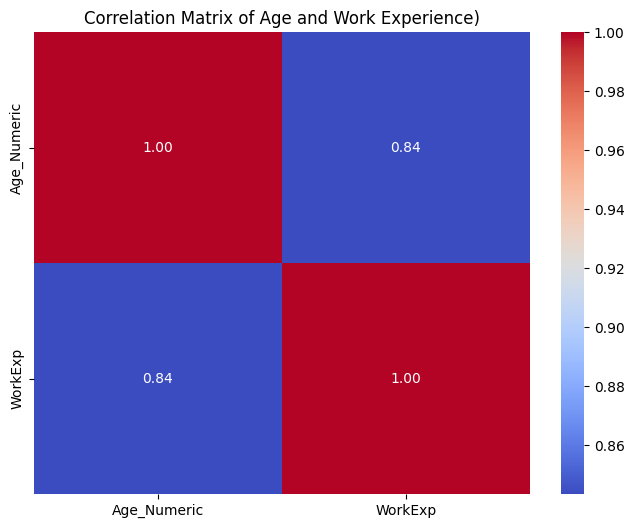

Correlation Matrix:
             Age_Numeric   WorkExp
Age_Numeric     1.000000  0.843399
WorkExp         0.843399  1.000000


In [26]:
#Map the 'Age' column to approximate numeric values
#If 'Age' is currently stored as a categorical variable (e.g., '18-24', '25-34'), it needs to be converted into a numerical representation
#This can be done by assigning a representative numerical value to each category (e.g., the midpoint of the age range).
age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Numeric'] = df['Age'].map(age_mapping)

#select only the numerical columns for correlation calculation (e.g. 
numerical_cols = ['Age_Numeric', 'WorkExp']
df_numeric = df[numerical_cols]

#compute correlations between Age_Numeric and WorkExp
correlation_matrix = df_numeric.corr()

#visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Age and Work Experience)')
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
